<a href="https://colab.research.google.com/github/kenny08gt/text-mining-tweets/blob/master/lab2_19000590.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Alan Hurtarte
## 19000590

---

# Laboratorio 2

In [0]:
import numpy as np
import cv2
import pandas as pd
import re

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
path = '/content/drive/My Drive/imagenes/lab2/'
file_name = 'tw_data.csv'
print(path + file_name)
data = pd.read_csv(path + file_name,  encoding = "ISO-8859-1")

/content/drive/My Drive/imagenes/lab2/tw_data.csv


In [0]:
data.columns = ['id', 'id2', 'date', 'query', 'owner', 'tweet']
data.describe

<bound method NDFrame.describe of          id  ...                                              tweet
0         0  ...  is upset that he can't update his Facebook by ...
1         0  ...  @Kenichan I dived many times for the ball. Man...
2         0  ...    my whole body feels itchy and like its on fire 
3         0  ...  @nationwideclass no, it's not behaving at all....
4         0  ...                      @Kwesidei not the whole crew 
5         0  ...                                        Need a hug 
6         0  ...  @LOLTrish hey  long time no see! Yes.. Rains a...
7         0  ...               @Tatiana_K nope they didn't have it 
8         0  ...                          @twittera que me muera ? 
9         0  ...        spring break in plain city... it's snowing 
10        0  ...                         I just re-pierced my ears 
11        0  ...  @caregiving I couldn't bear to watch it.  And ...
12        0  ...  @octolinz16 It it counts, idk why I did either...
13        0  .

In [0]:
users = []
p = re.compile(r"\@\w+\b", re.IGNORECASE)
for tweet in data['tweet']:
  result = p.findall(tweet)
  if result:
      for user in result:
        users.append(user)
unique =  np.unique(users)
print(len(users))

786608


In [0]:
from collections import Counter
counter = Counter(users) # equals to list(set(words)))
#count = Counter(users)# counts the elements' frequency)
counter.most_common




<bound method Counter.most_common of Counter({'@mileycyrus': 4500, '@tommcfly': 3887, '@ddlovato': 3467, '@DavidArchie': 1299, '@Jonasbrothers': 1287, '@jordanknight': 1130, '@DonnieWahlberg': 1104, '@mitchelmusso': 1077, '@JonathanRKnight': 1074, '@taylorswift13': 1011, '@jonasbrothers': 986, '@selenagomez': 801, '@dougiemcfly': 794, '@peterfacinelli': 637, '@aplusk': 624, '@joeymcintyre': 578, '@Dannymcfly': 546, '@gfalcone601': 540, '@shaundiviney': 511, '@YoungQ': 507, '@kirstiealley': 434, '@TomFelton': 428, '@stephenfry': 420, '@iamdiddy': 398, '@officialTila': 390, '@lilyroseallen': 387, '@ashleytisdale': 386, '@johncmayer': 381, '@AlexAllTimeLow': 375, '@dannywood': 368, '@PerezHilton': 365, '@Pink': 347, '@souljaboytellem': 346, '@andyclemmensen': 342, '@dannygokey': 341, '@markhoppus': 338, '@petewentz': 333, '@TheRealJordin': 329, '@KimKardashian': 327, '@Wossy': 322, '@trent_reznor': 314, '@Alyssa_Milano': 313, '@yelyahwilliams': 312, '@MariahCarey': 306, '@bradiewebbstack'

|Top Users|
|---|
|mileycyrus|
|tommcfly|
|ddlovato|

In [0]:
len(data)

1599999

In [0]:
top_users = ['mileycyrus', 'tommcfly', 'ddlovato']
corpus_mileycyrus = []
corpus_tommcfly = []
corpus_ddlovato = [] 

i = 0
for index, tweet in data.iterrows():
  single_corpus = {'content': '', 'metadata': {'id': '', 'timestamp': '', 'lenght': ''}}
  single_corpus['content'] = tweet['tweet']
  single_corpus['metadata']['id'] = tweet['id']
  single_corpus['metadata']['timestamp'] = tweet['id2']
  single_corpus['metadata']['lenght'] = len(tweet['tweet'].split()) 
  if top_users[0] in tweet['tweet']:
    #'id2', 'date', 'query', 'owner', 'tweet'
    corpus_mileycyrus.append(single_corpus)
    
  if top_users[1] in tweet['tweet']:
    #'id2', 'date', 'query', 'owner', 'tweet'
    corpus_tommcfly.append(single_corpus)
    
  if top_users[2] in tweet['tweet']:
    #'id2', 'date', 'query', 'owner', 'tweet'
    corpus_ddlovato.append(single_corpus)
  i+=1
    
      
  

In [0]:
print(len(corpus_mileycyrus))
print(len(corpus_tommcfly))
print(len(corpus_ddlovato))

4539
3893
3500


In [0]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
# !pip install autocorrect
from autocorrect import spell
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS 


In [0]:
# nltk.download('stopwords')
# nltk.download('punkt')
 
def clean_corpus(corpus):
  stop_words = set(stopwords.words('english')) 
  stop_words.add('http')
  stop_words.add('twitpic')
  stop_words.add('com')
  stop_words.add(top_users[0])
  stop_words.add(top_users[1])
  stop_words.add(top_users[2])
  out_corpus = []
  for corpus_el in corpus:
    tweet = corpus_el['content']
#   Remove digits
    tweet = ''.join(c for c in tweet if not c.isdigit())
    tokenizer = RegexpTokenizer(r'\w+')
#   Tokenize string
    word_tokens = tokenizer.tokenize(tweet)
#   Spell
#     word_tokens = [spell(w) for w in word_tokens]
#   To lower
    word_tokens = [token.lower() for token in word_tokens]
#   Remove stop words
    filtered_words = [word for word in word_tokens if word not in stop_words] 
    corpus_el['content_clean'] = filtered_words
    out_corpus.append(corpus_el)
    
  return out_corpus

In [0]:
# nltk.download('wordnet')
def corpus_summarize(corpus):
  all_tokens = []
  snowball_stemmer = SnowballStemmer('english')
  wordnet_lemmatizer = WordNetLemmatizer()
  for corpus_el in corpus:
    tokens = corpus_el['content_clean']
    stemmed_word = [snowball_stemmer.stem(word) for word in tokens]
    lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in stemmed_word]
    all_tokens.extend(lemmatized_word)
  
  return Counter(all_tokens), all_tokens
  

In [0]:

def generate_cloud(all_tokens):
  comment_words = "\n".join(str(item) + ' ' for item in all_tokens)
  
  wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = {}, 
                min_font_size = 10).generate(comment_words) 
  
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud) 
  plt.axis("off") 
  plt.tight_layout(pad = 0) 

  plt.show() 
 

In [0]:
def plot_bar(counter):
  counte_t = counter.most_common(10)
  counte_t_key = [token[0] for token in counte_t]
  counte_t_value = [token[1] for token in counte_t]
  plt.bar(counte_t_key, counte_t_value)

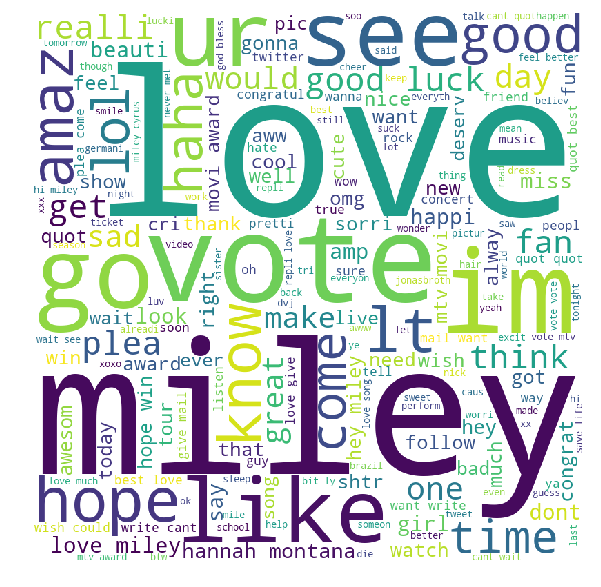

In [0]:
corpus_mileycyrus_tmp = clean_corpus(corpus_mileycyrus)
counter_m, all_tokens_m = corpus_summarize(corpus_mileycyrus_tmp)
generate_cloud(all_tokens_m)

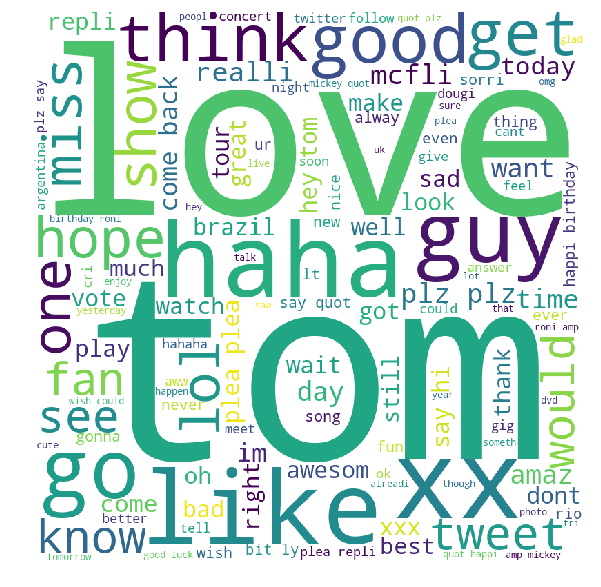

In [0]:
corpus_tommcfly_tmp = clean_corpus(corpus_tommcfly)
counter_t, all_tokens_t = corpus_summarize(corpus_tommcfly_tmp)
generate_cloud(all_tokens_t)

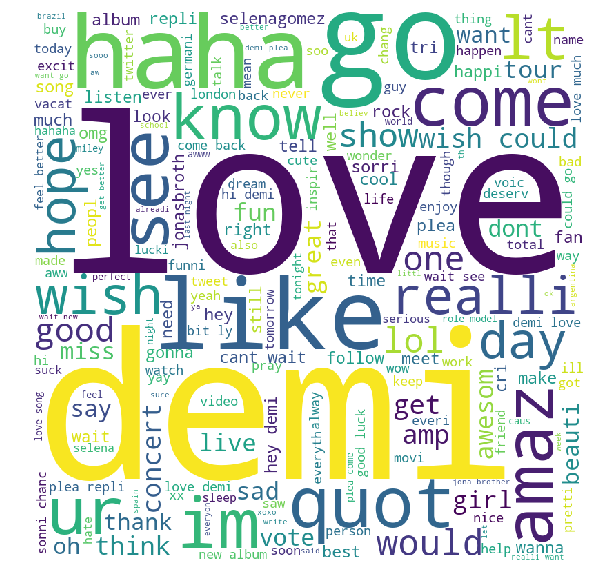

In [0]:
corpus_ddlovato_tmp = clean_corpus(corpus_ddlovato)
counter_d, all_tokens_d = corpus_summarize(corpus_ddlovato_tmp)
generate_cloud(all_tokens_d)

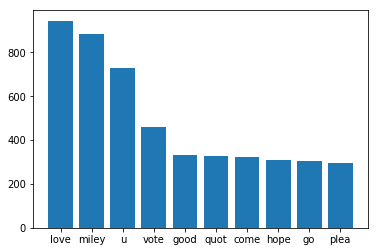

In [0]:
plot_bar(counter_m)

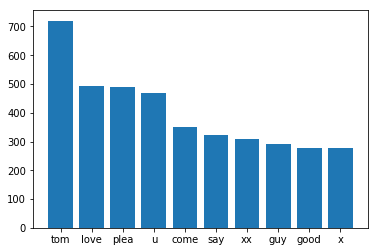

In [0]:
plot_bar(counter_t)

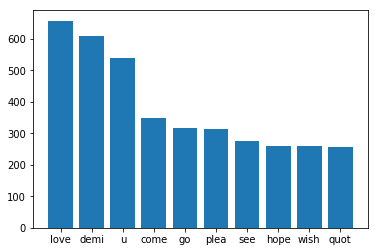

In [0]:
plot_bar(counter_d)

# Conclusiones
* **mileycyrus**: 
  * Parecen ser que las palabras mas usadas al mencionar a este usuario son:
    * Love, U, Vote, Good, Quot, Come, Hope, Go, Plea
* **tommcfly**:
  * Parecen ser que las palabras mas usadas al mencionar a este usuario son:
    * Love, plea, u, come, say, xx, guy, good, x
* **ddlovato**:
  * Parecen ser que las palabras mas usadas al mencionar a este usuario son:
    * Love, u, come, go, plea, see, hope, wish, quot
 
Parece ser que los tres usuarios son citados con contexto positivo en su mayoría